# 1. Exportanto os dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_clean = pd.read_csv(r'C:\Users\User W10\Desktop\ONE\Desafio Telecom X\TelecomXp2_Data.csv')

In [112]:
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,ContractDuration,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [113]:
df_clean['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [114]:
df_modelo = df_clean

In [115]:
df_modelo.shape

(7043, 22)

In [116]:
df_modelo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,ContractDuration,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [117]:
list(df_modelo.columns)

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'ContractDuration',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Contas_Diarias']

### 1.1 Eliminando colunas irrelevantes para modelos preditivos

In [118]:
df_modelo = df_modelo.drop(columns=['customerID','Contas_Diarias'])

##### > A coluna customerID atrapalharia o modelo por ser uma variável que não fornece informações sobre o cliente
##### > A coluna Contas_Diarias tem a mesma informação que MonthlyChargers só que na proporção diferente

### 1.2 Fazendo encoding das variáveis categóricas

In [119]:
colunas_categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df_modelo = pd.get_dummies(df_modelo, columns=colunas_categoricas, drop_first=False)

In [120]:
df_modelo = df_modelo.replace({'Yes': 1, 'No': 0, True: 1, False: 0})

C:\Users\User W10\AppData\Local\Temp\ipykernel_5300\1522335959.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo = df_modelo.replace({'Yes': 1, 'No': 0, True: 1, False: 0})


##### > As colunas categóricas que passaram por encoding foram:  MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport, StreamingTV, StreamingMovies, Contract , PaymentMethod

### 1.3 Avaliando o desequilibrio entre as classes

In [121]:
churn_counts = df_modelo['Churn'].value_counts()
churn_proportion = churn_counts / churn_counts.sum()

print("Contagem:")
print(churn_counts)
print("\nProporção:")
print(churn_proportion)


Contagem:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção:
Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


#### > A variável alvo esta em ~26% portanto existe um desequilíbrio entre as classes (ideal seria alog próximo de ~50%)

#### 1.3.1 Aplicando técnica SMOTE para ajustar os poucos exemplos da classe minoritária

In [122]:
#X = df_modelo.drop('Churn', axis=1)
#y = df_modelo['Churn']

In [123]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_res, y_res = smote.fit_resample(X, y)

#print(y_res.value_counts(normalize=True))

### > Aplicarei o smote somente nos dados de teste para evitar da Leakage

### 1.4 Aplicando normalização dos dados

In [124]:
from sklearn.preprocessing import MinMaxScaler

colunas_normalizar = ['ContractDuration', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df_modelo[colunas_normalizar] = scaler.fit_transform(df_modelo[colunas_normalizar])

#### > Usando MinMaxScaller pois vou usar algoritimos baseados em distância

# 2. Análisando a correlação com a variável alvo

### 2.1 Matriz de correlação com todas as variáveis

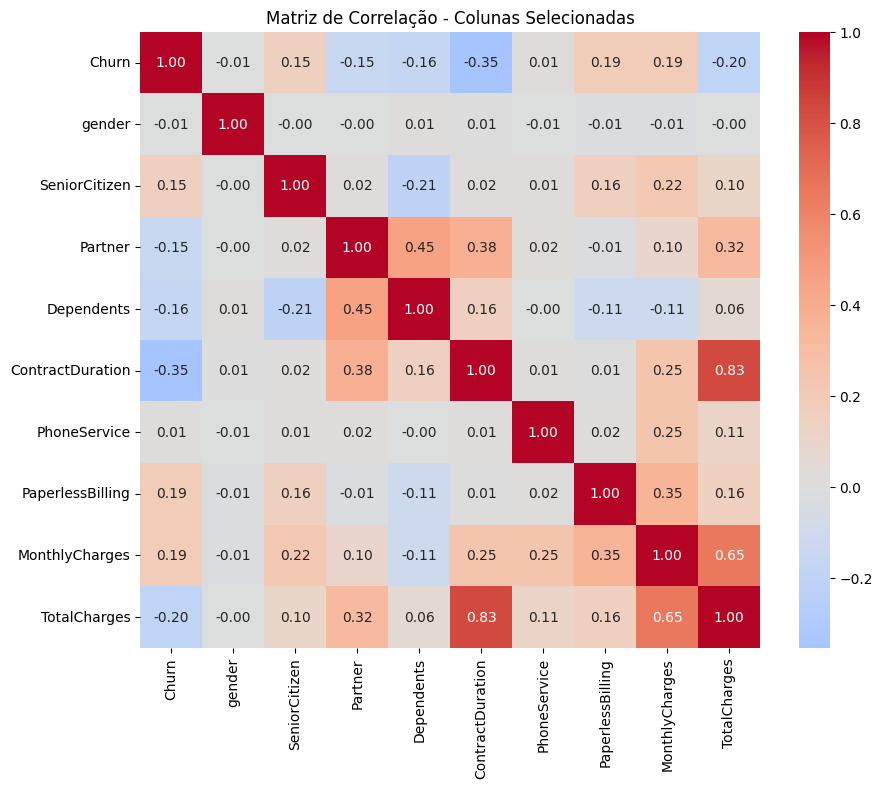

Correlação com Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198347
ContractDuration   -0.352229
Name: Churn, dtype: float64


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as colunas específicas
colunas_selecionadas = [
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'ContractDuration',
    'PhoneService',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges'
]

# Criar um subset com essas colunas
df_corr = df_modelo[colunas_selecionadas]

# Calcular matriz de correlação
corr_matrix = df_corr.corr()

# Plotar heatmap da correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - Colunas Selecionadas")
plt.show()

# Mostrar correlação das variáveis com Churn ordenadas
print("Correlação com Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))


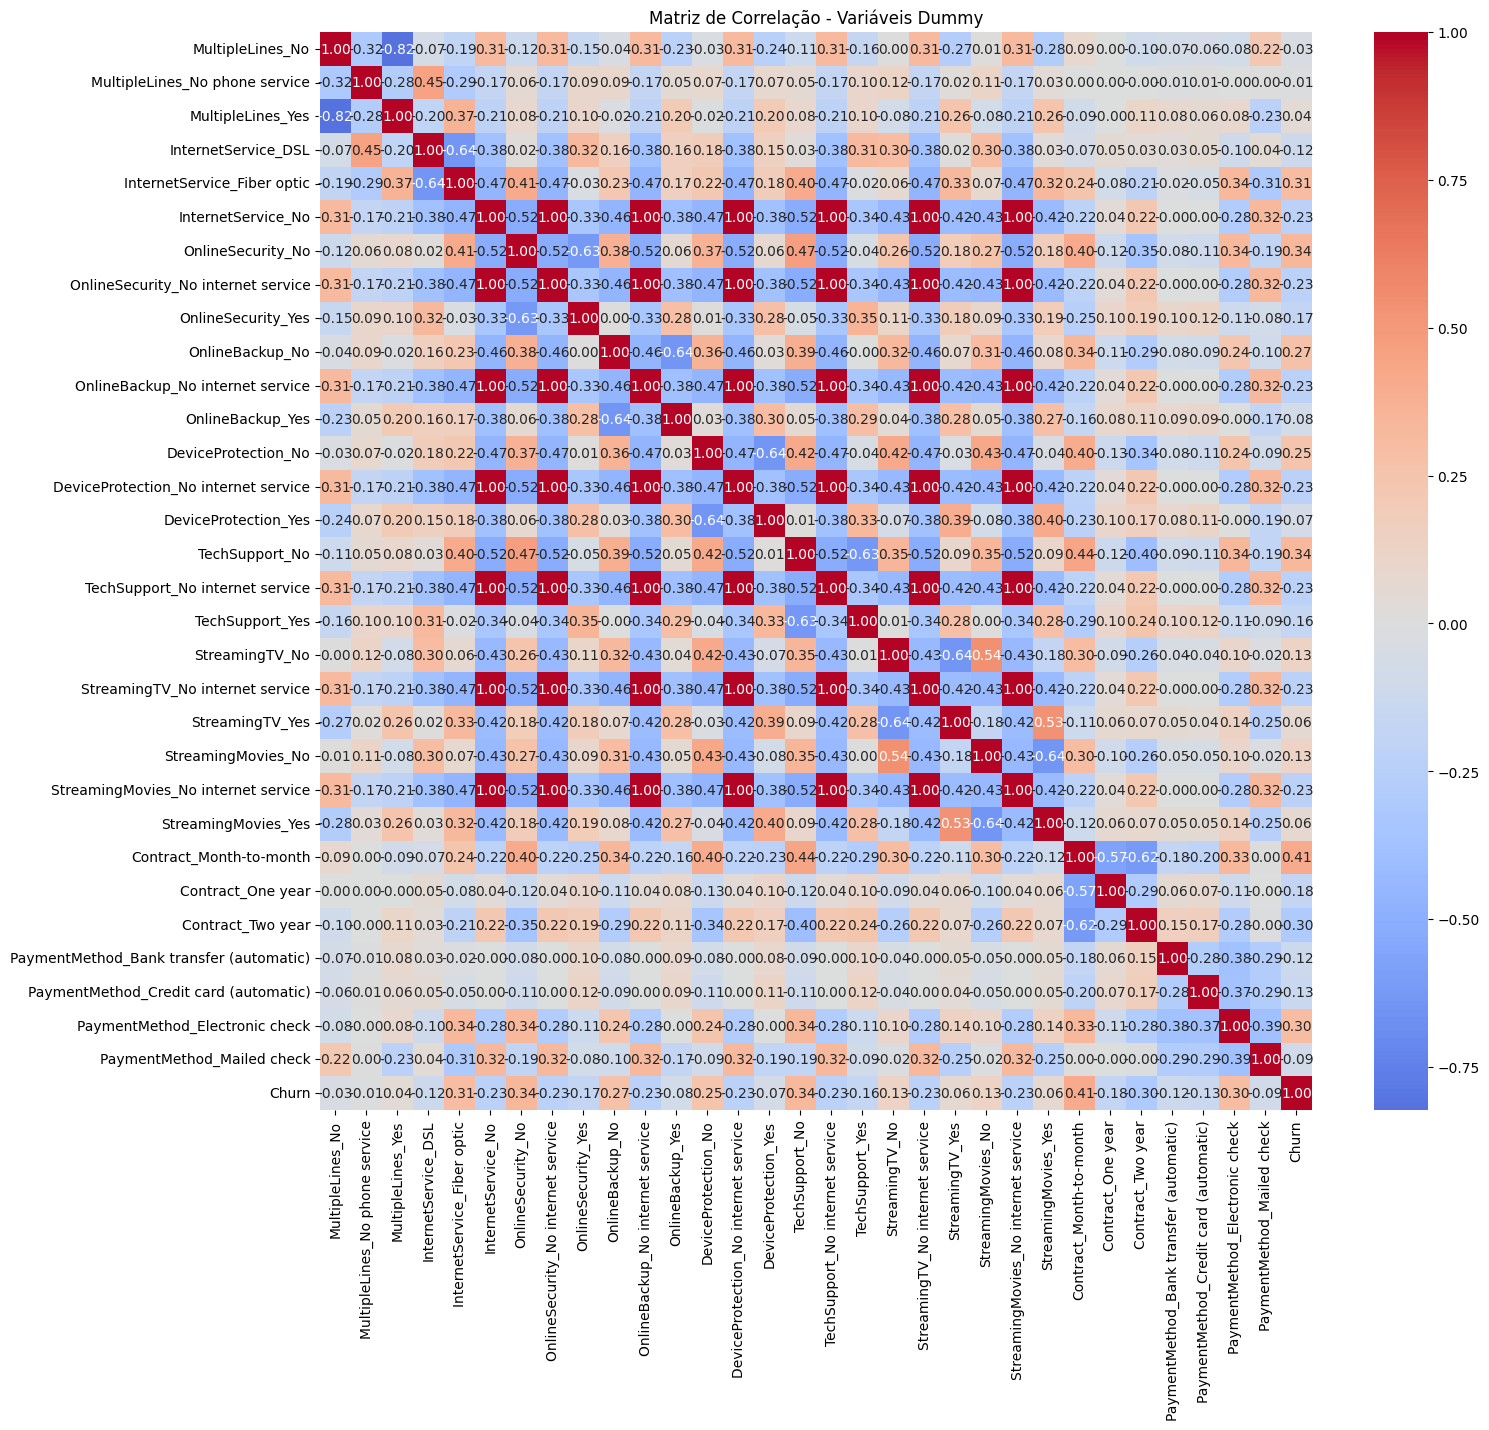

Correlação das variáveis dummy com Churn:
Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
MultipleLines_No phone service            -0.011942
MultipleLines_No                          -0.032569
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank tra

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas dummy para a matriz de correlação
colunas_dummy = [
    'MultipleLines_No',
    'MultipleLines_No phone service',
    'MultipleLines_Yes',
    'InternetService_DSL',
    'InternetService_Fiber optic',
    'InternetService_No',
    'OnlineSecurity_No',
    'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes',
    'OnlineBackup_No',
    'OnlineBackup_No internet service',
    'OnlineBackup_Yes',
    'DeviceProtection_No',
    'DeviceProtection_No internet service',
    'DeviceProtection_Yes',
    'TechSupport_No',
    'TechSupport_No internet service',
    'TechSupport_Yes',
    'StreamingTV_No',
    'StreamingTV_No internet service',
    'StreamingTV_Yes',
    'StreamingMovies_No',
    'StreamingMovies_No internet service',
    'StreamingMovies_Yes',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

# Verifica se 'Churn' está no df_modelo para relacionar correlação com evasão
if 'Churn' not in colunas_dummy:
    colunas_dummy.append('Churn')

# Seleciona o subset do dataframe
df_dummy_corr = df_modelo[colunas_dummy]

# Calcula matriz de correlação
corr_matrix = df_dummy_corr.corr()

# Plot do heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - Variáveis Dummy")
plt.show()

# Mostrar correlação com Churn ordenada
print("Correlação das variáveis dummy com Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))


#### 2.2 Correlção direcionada com outras variáveis

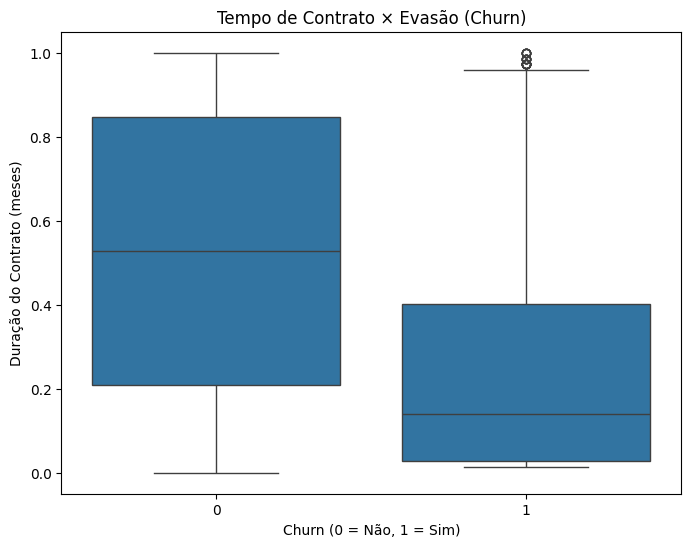

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='ContractDuration', data=df_modelo)
plt.title('Tempo de Contrato × Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Duração do Contrato (meses)')
plt.show()


#### > Clientes com tempo de contrato menor tem mais propenssão ao churn

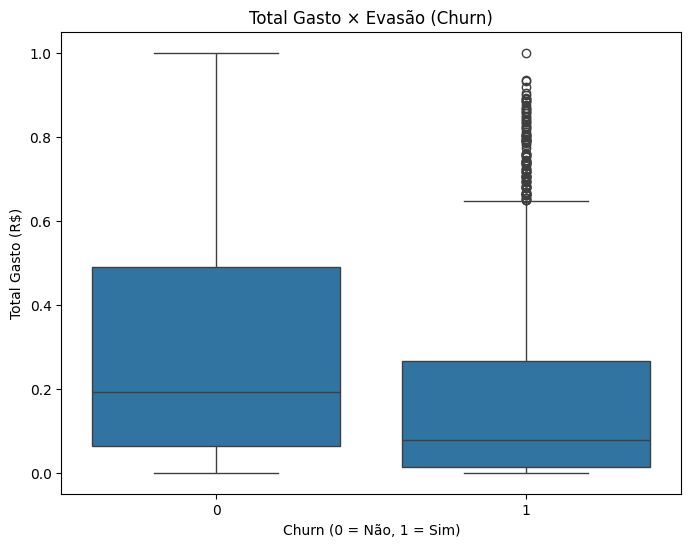

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df_modelo)
plt.title('Total Gasto × Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto (R$)')
plt.show()


#### > Clientes que já gastaram um certo ponto de gastos são clientes fiés e com menos chance de churn

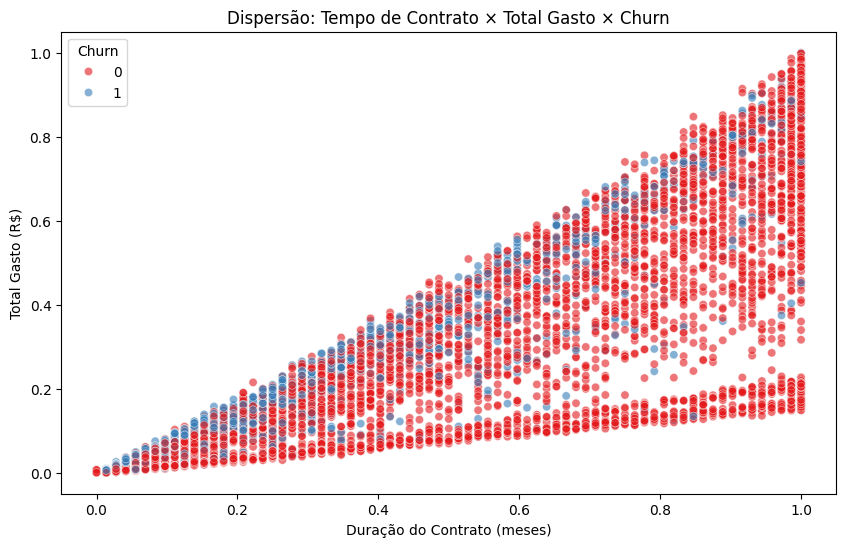

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ContractDuration',
    y='TotalCharges',
    hue='Churn',
    data=df_modelo,
    palette='Set1',
    alpha=0.6
)
plt.title('Dispersão: Tempo de Contrato × Total Gasto × Churn')
plt.xlabel('Duração do Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn')
plt.show()


#### > Os clientes com menos duração de contrato e gastos mais altos que os demais são os mais propenssos ao churn

### 2.3 Selecionando as variáveis melhores correlacionadas

In [130]:
# Lista das colunas com correlação > 0.3 em módulo
cols_high_corr = [
    'Churn',
    'ContractDuration',
    'Contract_Month-to-month',
    'OnlineSecurity_No',
    'TechSupport_No',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'Contract_Two year'
]

# Selecionar apenas essas colunas no df_modelo
df_modelo = df_modelo[cols_high_corr].copy()

# 3. Modelagem Preditiva

### 3.1 Separando os dados em treino e teste e aplicando SMOTE por causa do desequilibrio das variáveis

In [136]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


y = df_modelo['Churn']
X = df_modelo.drop('Churn', axis=1)

# 1. Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Verificar o balanceamento após o SMOTE
print("Proporção após SMOTE (treino):")
print(y_train_res.value_counts(normalize=True))

print("\nDimensões:")
print("X_train_res:", X_train_res.shape)
print("X_test:", X_test.shape)


Proporção após SMOTE (treino):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Dimensões:
X_train_res: (8278, 7)
X_test: (1409, 7)


#### 3.2.1 Modelo Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.05],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],  
    'max_iter': [50]
}

log_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1', 
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor F1-score na validação:", grid_search.best_score_)

# Treina o modelo final com os melhores parâmetros
best_log_model = grid_search.best_estimator_


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Melhores parâmetros: {'C': 0.05, 'class_weight': None, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-score na validação: 0.7700266224814319


#### > Ajustando o threshold

In [161]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Probabilidades previstas da classe 1 (Churn)
y_probs = best_log_model.predict_proba(X_test)[:, 1]

# Definindo o threshold
threshold = 0.5
y_pred_custom = np.where(y_probs >= threshold, 1, 0)

# Avaliando
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[751 284]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



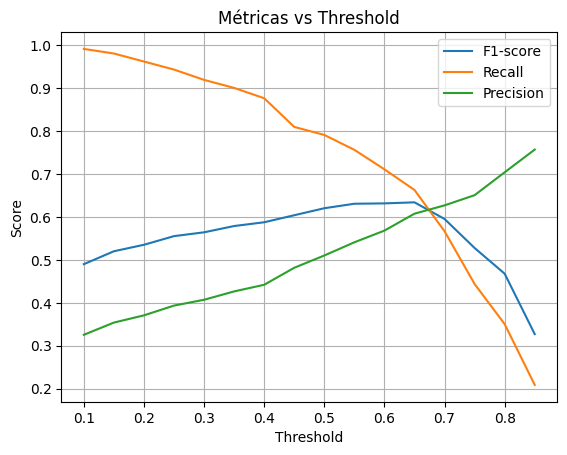

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score


thresholds = np.arange(0.1, 0.9, 0.05)
f1s = []
recalls = []
precisions = []

for t in thresholds:
    preds = np.where(y_probs >= t, 1, 0)
    f1s.append(f1_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))

plt.plot(thresholds, f1s, label='F1-score')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Métricas vs Threshold')
plt.legend()
plt.grid()
plt.show()


#### > manteremos em 0.5 para manter o equilibrio do F1-score

#### 3.2.2 Modelo Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [175],
    'max_depth': [10],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'class_weight': [None]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_res, y_train_res)

print("Melhores parâmetros RF:", grid_search_rf.best_params_)
print("Melhor F1-score na validação RF:", grid_search_rf.best_score_)

# Modelo final com melhores parâmetros
best_rf_model = grid_search_rf.best_estimator_



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores parâmetros RF: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 175}
Melhor F1-score na validação RF: 0.8010671469615783


#### 3.3 Avaliação dos modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ----------- REGRESSÃO LOGÍSTICA -----------
y_pred_log = best_log_model.predict(X_test)

print("📊 Regressão Logística")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log))

# ----------- RANDOM FOREST -----------
y_pred_rf = best_rf_model.predict(X_test)

print("🌲 Random Forest")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


📊 Regressão Logística
Matriz de Confusão:
[[751 284]
 [ 78 296]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

🌲 Random Forest
Matriz de Confusão:
[[766 269]
 [102 272]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1035
           1       0.50      0.73      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [141]:
print("Acurácia treino Random Forest:", best_rf_model.score(X_train_res, y_train_res))
print("Acurácia teste Random Forest:", best_rf_model.score(X_test, y_test))


Acurácia treino Random Forest: 0.839937182894419
Acurácia teste Random Forest: 0.7366926898509581


## ✅ Relatório Final — Modelagem Preditiva de Churn (Telecom X)

### 📦 1. Preparação dos Dados

#### 1.1 Colunas Originais
Os dados incluem 22 variáveis, entre elas:  
`customerID`, `Churn`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `ContractDuration`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`, `Contas_Diarias`.

#### 1.2 Eliminação de Colunas Irrelevantes
- `customerID`: identificador único, não contribui para o modelo.
- `Contas_Diarias`: contém informação redundante já expressa em `MonthlyCharges`.

#### 1.3 Encoding de Variáveis Categóricas
As seguintes colunas passaram por one-hot encoding:  
`MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaymentMethod`.

#### 1.4 Análise de Balanceamento
- Classe `Churn = 0`: 73.5%
- Classe `Churn = 1`: 26.5%

🔍 **Desequilíbrio identificado** → Aplicado **SMOTE** apenas nos dados de treino para evitar data leakage.

#### 1.5 Normalização
Foi utilizado o **MinMaxScaler** nas colunas numéricas:
- `ContractDuration`
- `MonthlyCharges`
- `TotalCharges`

---

### 📊 2. Análise de Correlação

#### 2.1 Correlações com a variável alvo (`Churn`)
Variáveis com destaque positivo:
- `Contract_Month-to-month` → **0.40**
- `OnlineSecurity_No` → **0.34**
- `TechSupport_No` → **0.33**
- `InternetService_Fiber optic` → **0.31**

Variáveis com destaque negativo:
- `ContractDuration` → **-0.35**
- `Contract_Two year` → **-0.30**

📌 Clientes com menor duração de contrato e que não usam serviços de segurança/apoio têm maior propensão ao churn.

#### 2.2 Variáveis Selecionadas para Modelagem
- `ContractDuration`
- `Contract_Month-to-month`
- `OnlineSecurity_No`
- `TechSupport_No`
- `InternetService_Fiber optic`
- `PaymentMethod_Electronic check`
- `Contract_Two year`

---

### 🤖 3. Modelagem Preditiva

#### 3.1 Divisão dos Dados
- 80% treino / 20% teste
- Aplicado **SMOTE** no treino → proporção 50/50 entre classes.

Dimensões:
- `X_train_res`: (8278, 7)
- `X_test`: (1409, 7)

---

### 📈 3.2 Modelos Treinados

#### 🔹 Regressão Logística (com GridSearch)
- Melhores parâmetros: `C=0.05`, `penalty='l1'`, `solver='liblinear'`, `max_iter=50`
- F1-score na validação: **0.77**
- Threshold mantido em **0.5**

#### 🔸 Random Forest (com GridSearch)
- Melhores parâmetros:  
  `n_estimators=175`, `max_depth=10`, `min_samples_split=4`, `min_samples_leaf=1`, `max_features='log2'`
- F1-score na validação: **0.80**

---

### 🧪 3.3 Avaliação dos Modelos

#### 📊 Regressão Logística
Matriz de Confusão:
```
[[751 284]
 [ 78 296]]
```

Relatório de Classificação:
| Métrica     | Classe 0 | Classe 1 |
|-------------|----------|----------|
| Precision   | 0.91     | 0.51     |
| Recall      | 0.73     | 0.79     |
| F1-score    | 0.81     | 0.62     |

- **Acurácia total**: 0.74

---

#### 🌲 Random Forest
Matriz de Confusão:
```
[[766 269]
 [102 272]]
```

Relatório de Classificação:
| Métrica     | Classe 0 | Classe 1 |
|-------------|----------|----------|
| Precision   | 0.88     | 0.50     |
| Recall      | 0.74     | 0.73     |
| F1-score    | 0.81     | 0.59     |

- **Acurácia treino**: 0.84  
- **Acurácia teste**: 0.74

---

### 🧠 Conclusões

- Ambos os modelos tiveram desempenho semelhante em termos de **acurácia (0.74)**.
- A **Regressão Logística** teve melhor **recall para churn (classe 1)**, o que é crucial em modelos de evasão.
- A **Random Forest** se destacou levemente no F1-score geral da validação e estabilidade, mas com possível **leve overfitting**.
- As variáveis com maior influência no churn foram:
  - `Contract_Month-to-month`
  - `OnlineSecurity_No`
  - `TechSupport_No`
  - `ContractDuration`

✅ **Recomendação**: seguir com a **Regressão Logística** para maior controle e explicabilidade, ou usar **Random Forest** com ajustes para melhor generalização.
